<a href="https://colab.research.google.com/github/1Mouaci/Augmented_image/blob/main/Augmented_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import numpy as np

In [ ]:
mnist

<module 'keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/datasets/mnist.py'>

In [ ]:
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print('X_train: ' + str(mnist_x_train.shape))
print('Y_train: ' + str(mnist_y_train.shape))
print('X_test:  '  + str(mnist_x_test.shape))
print('Y_test:  '  + str(mnist_y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
from matplotlib import pyplot

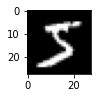

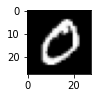

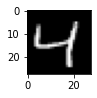

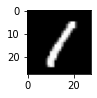

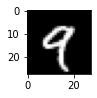

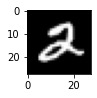

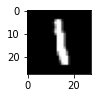

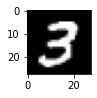

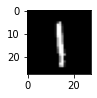

In [ ]:

for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(mnist_x_train[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [ ]:
import tensorflow as tf


In [ ]:

print('mnist_x_train: ' + str(mnist_x_train.shape))


mnist_x_train: (60000, 28, 28)


In [ ]:
#Ajout d'une dimension pour passer a RGB
mnist_x_train = tf.expand_dims(mnist_x_train, -1)
mnist_x_test = tf.expand_dims(mnist_x_test, -1)

In [ ]:

print('mnist_x_train: ' + str(mnist_x_train.shape))


mnist_x_train: (60000, 28, 28, 1)


In [ ]:

print('mnist_y_train: ' + str(mnist_y_train.shape))


mnist_y_train: (60000,)


In [ ]:
#mettre les y dans un tableau tf
mnist_y_train = tf.one_hot(mnist_y_train, 10).numpy()

In [ ]:
!pip install -q tf-models-official


     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 352 kB 56.6 MB/s 
     |████████████████████████████████| 4.9 MB 44.5 MB/s 
     |████████████████████████████████| 1.2 MB 67.0 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 596 kB 53.9 MB/s 
     |████████████████████████████████| 99 kB 9.1 MB/s 
     |████████████████████████████████| 47.6 MB 1.4 MB/s 
     |████████████████████████████████| 1.1 MB 48.4 MB/s 
     |████████████████████████████████| 213 kB 75.4 MB/s 
     |████████████████████████████████| 90 kB 8.0 MB/s 


In [ ]:
from official.vision.image_classification.augment import RandAugment


In [ ]:
#on instancier RandAugmant avec deux couche
augmenter = RandAugment(num_layers=3, magnitude=7)


In [ ]:
#les differents opérations de transformations
augmenter.available_ops

['AutoContrast',
 'Equalize',
 'Invert',
 'Rotate',
 'Posterize',
 'Solarize',
 'Color',
 'Contrast',
 'Brightness',
 'Sharpness',
 'ShearX',
 'ShearY',
 'TranslateX',
 'TranslateY',
 'Cutout',
 'SolarizeAdd']

In [ ]:
#on aura besoin des image 32*32
RESIZE_TO = 32


In [ ]:
mnist_x_train[0].shape

TensorShape([28, 28, 1])

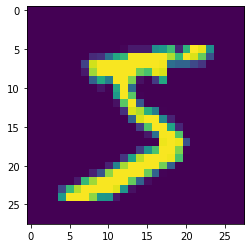

In [ ]:
pyplot.imshow(mnist_x_train[0][:,:,0])
pyplot.show()

In [ ]:
def augmenter_image(image, source=True):
    #image : image à augmenter
    #source: l'image sera utilisé comme source dans l'entrainement
    #        donc il faut la redimensionner vers 32*32*3 (RGB)  
    #convertir les type des images vers float32
    if image.dtype != tf.float32:
        image = tf.cast(image, tf.float32)

    if source:
        image = tf.image.resize_with_pad(image, RESIZE_TO, RESIZE_TO)
        image = tf.tile(image, [1, 1, 3])
    #Appliquer la méthode d'augmentation de RandAugment         
    image = augmenter.distort(image)
    return image

In [ ]:
augmenter_image(mnist_x_train[0]).shape

TensorShape([32, 32, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


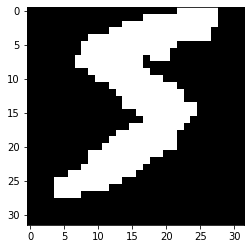

In [ ]:
pyplot.imshow(augmenter_image(mnist_x_train[0]))
pyplot.show()


In [ ]:
def augmenter_dataset(ds, aug_func, batch_size, source=True):
    ds = ds.shuffle(batch_size * 10, seed=42)

    if source:
        ds = ds.map(lambda x, y: (aug_func(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    else:
        ds = ds.map(lambda x, y: (aug_func(x, False), y), num_parallel_calls=tf.data.AUTOTUNE)
    #On utilise la ligne suivante pour deviser le jeux de donnée en batch de BATCH_SIZE
    #ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)    
    return ds

In [ ]:
#Definir un BATCH_SIZE 
BATCH_SIZE = 32
source_ds = tf.data.Dataset.from_tensor_slices((mnist_x_train, mnist_y_train))
#les données augmenté seront deviser dans des batch de BATCH_SIZE 
source_ds_s = augmenter_dataset(source_ds, augmenter_image, BATCH_SIZE )


In [ ]:
data_set = source_ds_s.as_numpy_iterator()

In [ ]:
#la liste de tous les image augmenté en utilisant Randugment, chaque entré contient 
# l'image en RGB(32*32*3) et un tableau a 10 entré dont la case de l'indexe indiquant
# le nombre est = 1
images_augmente = list(data_set)

In [ ]:
images_augmente[0]

(array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


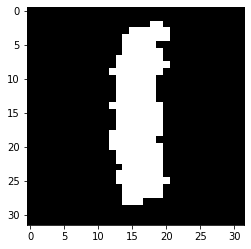

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(array([1]),)


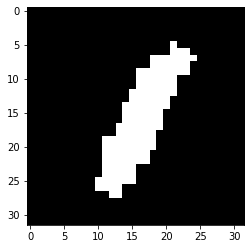

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(array([1]),)


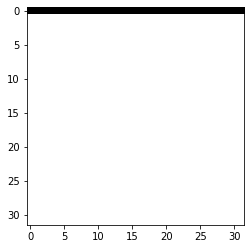

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(array([7]),)


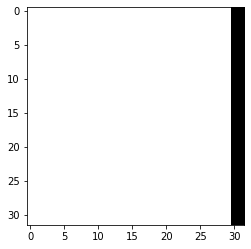

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(array([2]),)


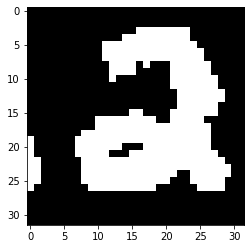

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(array([2]),)


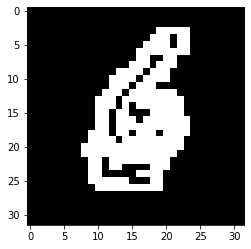

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(array([6]),)


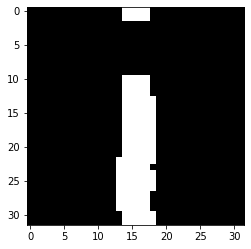

(array([1]),)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


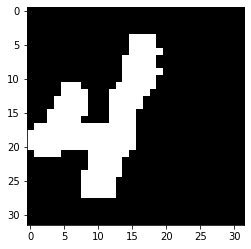

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(array([4]),)


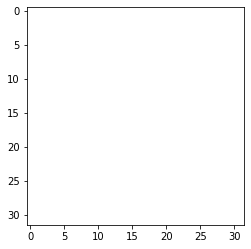

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(array([0]),)


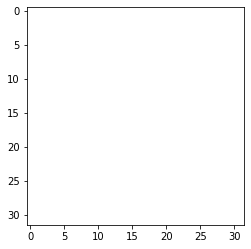

(array([7]),)


In [ ]:
#l'image dans la premiere position 
for i in range(00, 10):
  pyplot.imshow(images_augmente[i][0])
  pyplot.show()
  #l'indice du label en deuxieme position
  print(np.where(images_augmente[i][1]==(1)))